In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import stats
from scipy import signal

### 波形产生——线性调频信号
$y=e^{j{\pi}\frac{B}{\tau}t^2}$
* B为扫频宽度
* $\tau$为脉冲宽度

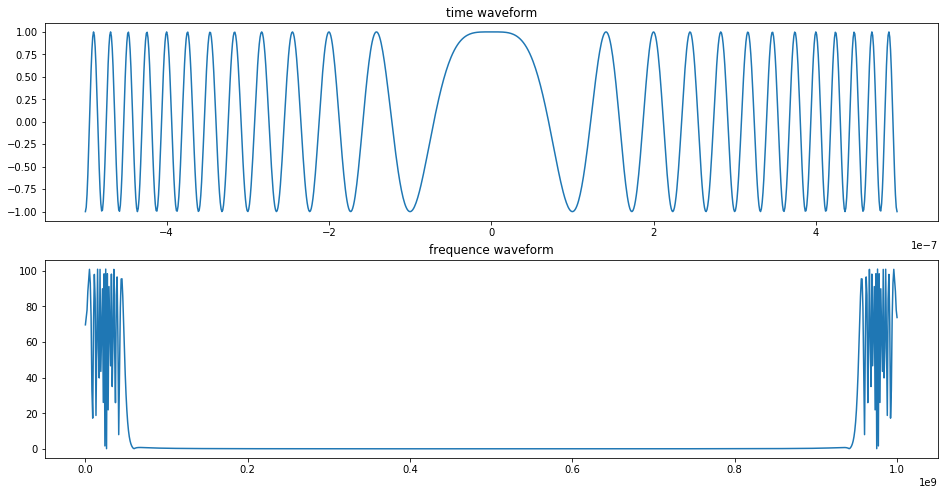

In [2]:
W = 1e-6    # 脉冲宽度
T = 1e-3    # 重复周期
B = 1e8     # 扫频宽度
fs = 1e9    # 采样频率

t = np.linspace(-W/2,W/2,int(fs*W))
sig = np.exp(1j*np.pi*B/W*(t**2))
sig_I = np.real(sig)
sig_Q = np.imag(sig)
ffty = np.abs(np.fft.fft(sig_I))

plt.figure(figsize=(16,8))
plt.subplot('211')
plt.plot(t,np.real(sig))
plt.title('time waveform')
plt.subplot('212')
plt.plot(np.linspace(0,fs,int(fs*W)),ffty)
# plt.yscale('log')
# plt.xlim(xmin=0,xmax=1e8)
plt.title('frequence waveform')
plt.show()


### IQ调制
$cos(2{\pi}f_0t－{\pi}\frac{B}{\tau}t^2)=cos(2{\pi}f_0t)*cos({\pi}\frac{B}{\tau}t^2)+sin(2{\pi}f_0t)*sin({\pi}\frac{B}{\tau}t^2)$

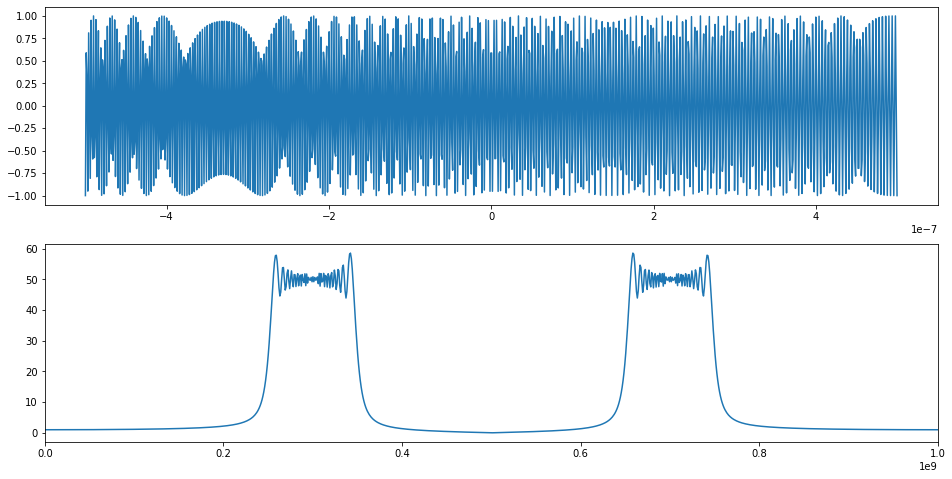

In [3]:
f_0 = 3e8    # 载频频率

sig_IF = np.cos(2*np.pi*f_0*t)*sig_I+np.sin(2*np.pi*f_0*t)*sig_Q
fft_IF = np.abs(np.fft.fft(sig_IF))

plt.figure(figsize=(16,8))
plt.subplot('211')
plt.plot(t,sig_IF)
plt.subplot('212')
plt.plot(np.linspace(0,fs,int(fs*W)),fft_IF)
plt.xlim(xmin=0,xmax=1e9)
plt.show()

### 回波模拟
* 接收信号幅度：

$P_r=\frac{P_tG_tG_rc^2\sigma}{(4\pi)^3R^4f^2L}$

$A_r=\sqrt{P_r}$

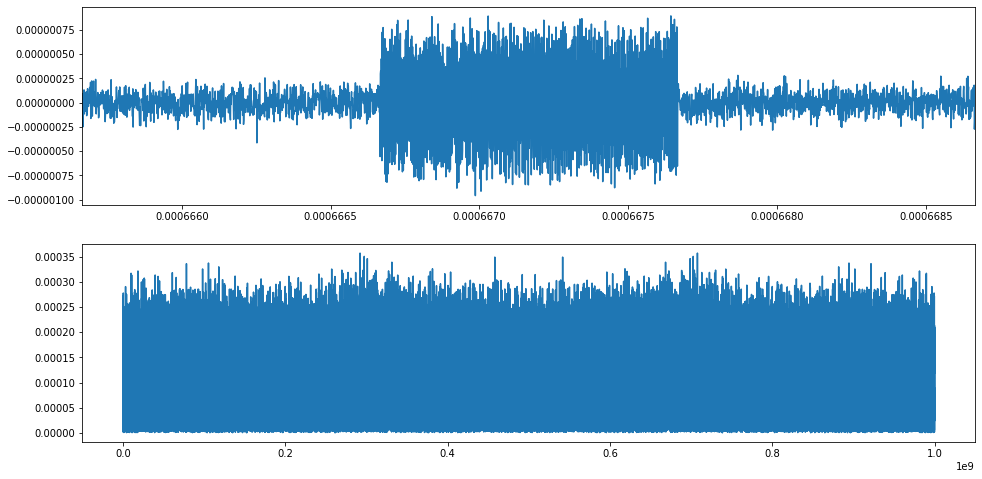

In [4]:
Pt = 1e3 # 发射功率w
G = 1e3 # 收发增益
L = 1 # 损耗

sigma = 100 # 目标横截面积m2
R = 100000 # 目标距离m
v = 0 # 目标速度m/s

G_var = 10 # 高斯白噪声方差
G_A = 1e-8 # 噪声幅度

tt = np.linspace(0,T,int(fs*T))

G_noise = G_A*stats.norm.rvs(loc=0,scale=G_var,size=int(fs*T))

Ar = np.sqrt((Pt*G*G*sigma*9e16)/((4*np.pi)**3*R**4*f_0**2*L))
Nr = int(fs*2*R/3e8) # 延时时间内的采样点数

xx = np.concatenate((np.zeros(Nr),sig_IF))
Yr = Ar*np.concatenate((xx,np.zeros(int(fs*T)-len(xx))))+G_noise

plt.figure(figsize=(16,8))
plt.subplot('211')
plt.plot(tt,Yr)
plt.xlim(xmin=Nr/fs-W,xmax=Nr/fs+2*W)
plt.subplot('212')
plt.plot(np.linspace(0,fs,int(fs*T)),np.abs(np.fft.fft(Yr)))
plt.show()

### IQ解调
$cos(a-b)*cos(a)=\frac{1}{2}[cos(b)+cos(2a-b)]$

$cos(a-b)*sin(a)=\frac{1}{2}[sin(b)+sin(2a-b)]$

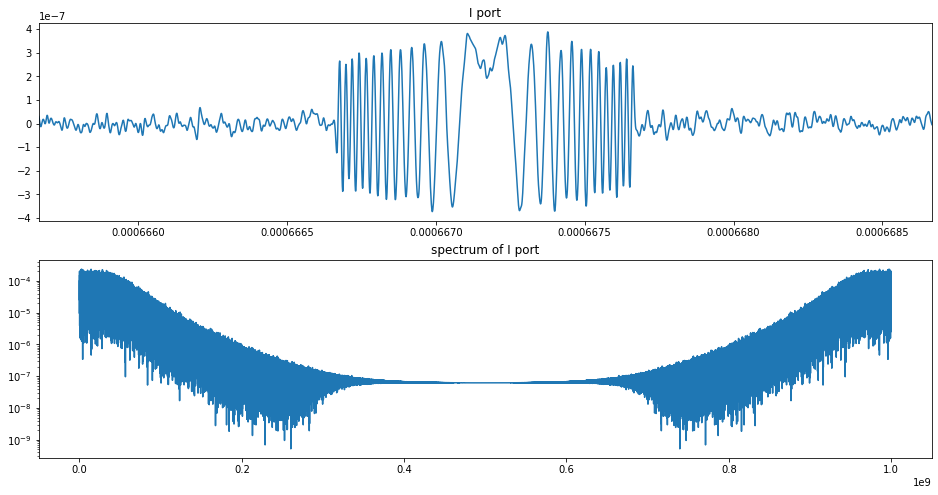

In [5]:
mm,nn = signal.butter(2,2*6e7/fs,'lowpass') # 配置低通滤波器
sig_IR = signal.filtfilt(mm,nn,Yr*np.cos(2*np.pi*f_0*tt))
sig_QR = signal.filtfilt(mm,nn,Yr*np.sin(2*np.pi*f_0*tt))

plt.figure(figsize=(16,8))
plt.subplot('211')
plt.plot(tt,sig_IR)
plt.xlim(xmin=Nr/fs-W,xmax=Nr/fs+2*W)
plt.title('I port')
plt.subplot('212')
plt.plot(np.linspace(0,fs,int(fs*T)),np.abs(np.fft.fft(sig_IR)))
plt.yscale('log')
plt.title('spectrum of I port')
plt.show()

### 匹配滤波
$y(t)=\int_{-\propto}^{+\propto}x(u)h(t-u)du$

$y(t)=IFFT[X(j\omega)H^*(j\omega)e^{-j{\omega}t_0}]$

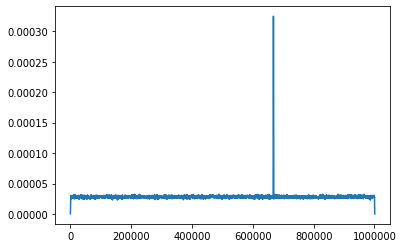

0.00032483867420146965


In [7]:
sig_match = np.convolve(np.abs(sig_IR+1j*sig_QR),np.abs(sig_I+1j*sig_Q))
plt.plot(sig_match)
plt.show()
print('目标

In [12]:
a = np.array([1,2,3,7,4,5])
np.where(a==np.max(a))[0][0]

3